In [ ]:
from google.colab import drive
drive.mount('/content/drive')

base_dir = '/content/drive/MyDrive/NNFLL FINAL'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base_dir = '/content/drive/MyDrive/NNFLL FINAL'

train_path = base_dir + '/train'
val_path = base_dir + '/valid'
test_path = base_dir + '/test'


In [ ]:
import tensorflow as tf
import numpy as np
import random
import os

# Set a fixed seed for reproducibility
SEED = 42
os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
print(f"Global seed set to {SEED}")

Global seed set to 42


In [ ]:
import tensorflow as tf

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_path,
    image_size=(224, 224),
    batch_size=32,
    label_mode='binary'
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_path,
    image_size=(224, 224),
    batch_size=32,
    label_mode='binary'
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_path,
    image_size=(224, 224),
    batch_size=32,
    label_mode='binary'
)


Found 6800 files belonging to 2 classes.
Found 900 files belonging to 2 classes.
Found 900 files belonging to 2 classes.


--- Actual Data Counts Retrieved ---
            NoFire  Fire
Split                   
Train         3200  3600
Validation     200   700
Test           200   700
-----------------------------------


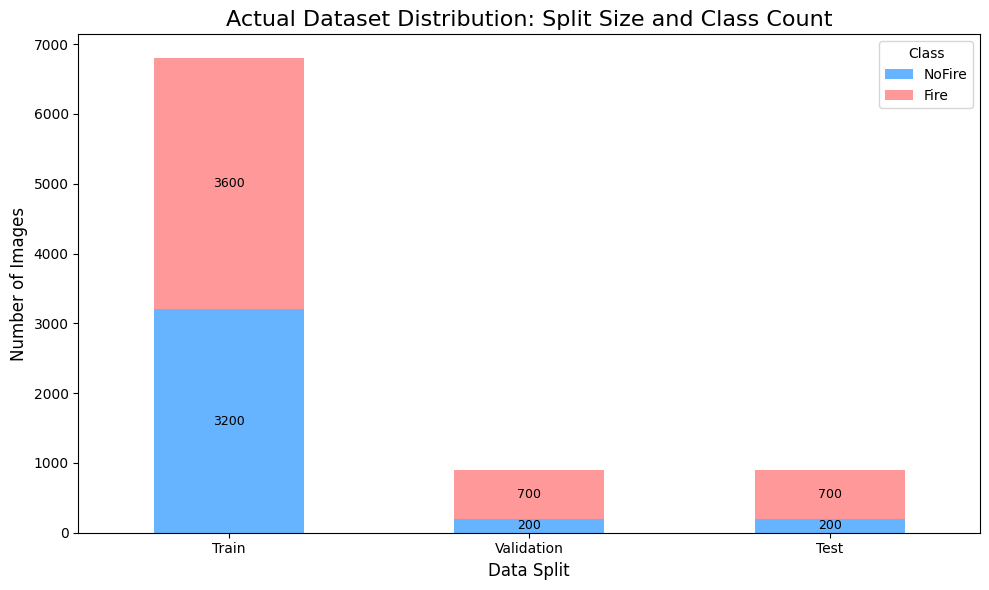

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# ====================================================================
# !!! PATH SET !!!
# Using the path you provided for your dataset directory.
# ====================================================================
DATA_ROOT_PATH = '/content/drive/MyDrive/NNFLL FINAL'

def get_class_counts(split_name):
    """Counts the number of images in 'fire' and 'nofire' subfolders for a given split."""
    split_path = os.path.join(DATA_ROOT_PATH, split_name)

    try:
        fire_path = os.path.join(split_path, 'fire')
        nofire_path = os.path.join(split_path, 'nofire')

        # Use os.listdir() to count files in the directories
        fire_count = len(os.listdir(fire_path))
        nofire_count = len(os.listdir(nofire_path))

        return nofire_count, fire_count
    except FileNotFoundError as e:
        print(f"Error: Directory not found for split '{split_name}'.")
        print(f"Please ensure the structure is: {DATA_ROOT_PATH}/{split_name}/fire and {DATA_ROOT_PATH}/{split_name}/nofire")
        return 0, 0
    except Exception as e:
        print(f"An unexpected error occurred while counting files: {e}")
        return 0, 0

# --- 1. Get Actual Counts (Now correctly using 'valid') ---
train_nofire, train_fire = get_class_counts('train')
# Corrected the split name from 'validation' to 'valid'
validation_nofire, validation_fire = get_class_counts('valid')
test_nofire, test_fire = get_class_counts('test')

# --- 2. Create DataFrame ---
data = {
    'Split': ['Train', 'Validation', 'Test'],
    'NoFire': [train_nofire, validation_nofire, test_nofire],
    'Fire': [train_fire, validation_fire, test_fire]
}

df_dist = pd.DataFrame(data).set_index('Split')

print("--- Actual Data Counts Retrieved ---")
print(df_dist)
print("-" * 35)

# --- 3. PLOTTING STACKED BAR CHART ---
colors = ['#66b3ff', '#ff9999']

fig, ax = plt.subplots(figsize=(10, 6))

df_dist[['NoFire', 'Fire']].plot(kind='bar',
                                 stacked=True,
                                 color=colors,
                                 ax=ax)

# Set plot details
ax.set_title('Actual Dataset Distribution: Split Size and Class Count', fontsize=16)
ax.set_ylabel('Number of Images', fontsize=12)
ax.set_xlabel('Data Split', fontsize=12)
ax.legend(title='Class', loc='upper right')
plt.xticks(rotation=0)

# Add annotations (segment and total counts)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()

    # Annotate count for each segment
    if height > 0:
        ax.annotate(f'{int(height)}', (x + width/2, y + height/2), ha='center', va='center', fontsize=9, color='black')

    # Annotate total count on top of the stack
    if p.get_facecolor() == colors[1] and ax.patches.index(p) > 0:
        bottom_height = ax.patches[ax.patches.index(p) - 1].get_height()
        total_height = height + bottom_height
        if total_height > 0:
            ax.annotate(f'{int(total_height)}', (x + width/2, total_height + 50), ha='center', va='bottom', fontsize=10, weight='bold')


plt.tight_layout()
plt.show()

In [ ]:
import os

print("Training dataset:")
for class_name in train_ds.class_names:
    class_dir = os.path.join(train_path, class_name)
    count = len(os.listdir(class_dir))
    print(f"  Class: {class_name}, Folder: {class_dir}, Count: {count}")

print("\nValidation dataset:")
for class_name in val_ds.class_names:
    class_dir = os.path.join(val_path, class_name)
    count = len(os.listdir(class_dir))
    print(f"  Class: {class_name}, Folder: {class_dir}, Count: {count}")

print("\nTest dataset:")
for class_name in test_ds.class_names:
    class_dir = os.path.join(test_path, class_name)
    count = len(os.listdir(class_dir))
    print(f"  Class: {class_name}, Folder: {class_dir}, Count: {count}")

Training dataset:
  Class: fire, Folder: /content/drive/MyDrive/NNFLL FINAL/train/fire, Count: 3600
  Class: nofire, Folder: /content/drive/MyDrive/NNFLL FINAL/train/nofire, Count: 3200

Validation dataset:
  Class: fire, Folder: /content/drive/MyDrive/NNFLL FINAL/valid/fire, Count: 700
  Class: nofire, Folder: /content/drive/MyDrive/NNFLL FINAL/valid/nofire, Count: 200

Test dataset:
  Class: fire, Folder: /content/drive/MyDrive/NNFLL FINAL/test/fire, Count: 700
  Class: nofire, Folder: /content/drive/MyDrive/NNFLL FINAL/test/nofire, Count: 200


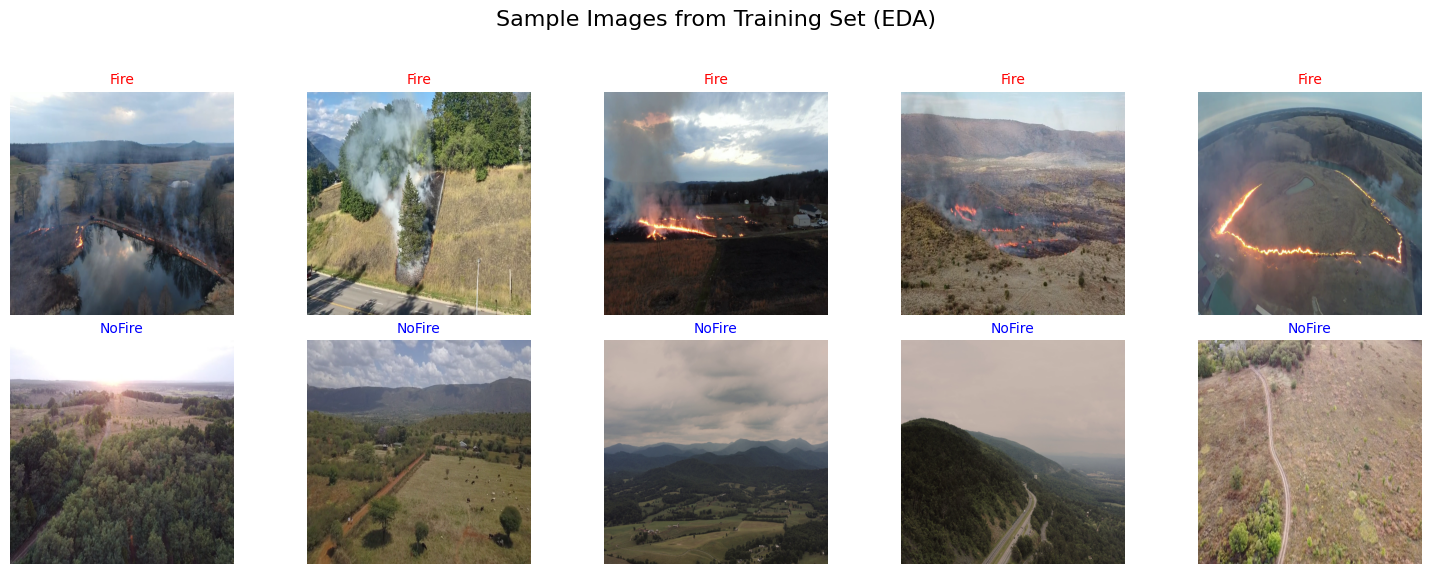

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# --- CRITICAL: Set the Path ---
DATA_ROOT_PATH = '/content/drive/MyDrive/NNFLL FINAL'
TRAIN_PATH = os.path.join(DATA_ROOT_PATH, 'train')

FIRE_DIR = os.path.join(TRAIN_PATH, 'fire')
NOFIRE_DIR = os.path.join(TRAIN_PATH, 'nofire')

# --- 1. Get File Lists ---
try:
    fire_files = os.listdir(FIRE_DIR)
    nofire_files = os.listdir(NOFIRE_DIR)

    # Filter out non-image files if necessary (e.g., .DS_Store, etc.)
    fire_images = [f for f in fire_files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    nofire_images = [f for f in nofire_files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

except FileNotFoundError:
    print(f"Error: Could not find training directories. Check path: {TRAIN_PATH}")
    fire_images = []
    nofire_images = []

# --- 2. Select 5 Random Samples from each class ---
NUM_SAMPLES = 5
sample_fire = random.sample(fire_images, min(NUM_SAMPLES, len(fire_images)))
sample_nofire = random.sample(nofire_images, min(NUM_SAMPLES, len(nofire_images)))

# --- 3. Plotting Grid ---
fig, axes = plt.subplots(2, NUM_SAMPLES, figsize=(15, 6))
fig.suptitle('Sample Images from Training Set (EDA)', fontsize=16)

# Function to plot a single image
def plot_image(ax, filename, label):
    try:
        img_path = os.path.join(FIRE_DIR if label == 'Fire' else NOFIRE_DIR, filename)
        img = mpimg.imread(img_path)
        ax.imshow(img)
        ax.set_title(label, fontsize=10, color='red' if label == 'Fire' else 'blue')
        ax.axis('off')
    except Exception as e:
        ax.set_title(f"Error loading: {e}", fontsize=8)
        ax.axis('off')

# Plot Fire Samples (Top Row)
for i, filename in enumerate(sample_fire):
    plot_image(axes[0, i], filename, 'Fire')

# Plot NoFire Samples (Bottom Row)
for i, filename in enumerate(sample_nofire):
    plot_image(axes[1, i], filename, 'NoFire')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

def prepare(ds, shuffle=False):
    ds = ds.map(lambda x, y: (x/255.0, y))
    if shuffle:
        ds = ds.shuffle(1000)
    return ds.cache().prefetch(buffer_size=AUTOTUNE)

train_ds = prepare(train_ds, shuffle=True)
val_ds = prepare(val_ds)
test_ds = prepare(test_ds)


In [ ]:
from tensorflow.keras import layers, models

custom_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

custom_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

custom_model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_custom = custom_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)

Epoch 1/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 572s 881ms/step - accuracy: 0.7627 - loss: 0.4827 - val_accuracy: 0.9178 - val_loss: 0.3551
Epoch 2/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - accuracy: 0.9455 - loss: 0.1441 - val_accuracy: 0.9956 - val_loss: 0.0454
Epoch 3/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - accuracy: 0.9692 - loss: 0.0880 - val_accuracy: 0.8889 - val_loss: 0.2994
Epoch 4/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - accuracy: 0.9616 - loss: 0.1076 - val_accuracy: 0.9689 - val_loss: 0.0826
Epoch 5/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - accuracy: 0.9919 - loss: 0.0226 - val_accuracy: 0.9867 - val_loss: 0.0857
Epoch 6/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - accuracy: 0.9897 - loss: 0.0329 - val_accuracy: 0.9956 - val_loss: 0.0163
Epoch 7/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.9901 - loss: 0.0259 - val_accuracy: 0.9844 - val_loss: 0.0398
Epoch 8/20
213/213 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.9912 - loss: 0.0223 

In [ ]:
import os
import numpy as np
import cv2 # OpenCV is often more efficient for image processing than matplotlib/PIL

# --- CRITICAL: Set the Path ---
DATA_ROOT_PATH = '/content/drive/MyDrive/NNFLL FINAL'
TRAIN_PATH = os.path.join(DATA_ROOT_PATH, 'train')

# Initialize lists to store mean and std dev for each image
all_means = []
all_stds = []
file_count = 0

print("Starting calculation of channel-wise means and standard deviations...")

for class_name in ['fire', 'nofire']:
    class_path = os.path.join(TRAIN_PATH, class_name)

    # Check if the directory exists
    if not os.path.isdir(class_path):
        print(f"Skipping {class_name}: Directory not found at {class_path}")
        continue

    for filename in os.listdir(class_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(class_path, filename)

            # Read image using OpenCV (loads as BGR)
            img = cv2.imread(img_path)

            if img is not None:
                # Convert to float and normalize to 0-1 range before calculating stats
                img_float = img.astype(np.float32) / 255.0

                # Calculate mean and std dev across width and height (axis 0 and 1)
                mean, std = cv2.meanStdDev(img_float)

                # mean and std are now [B, G, R] for this image
                all_means.append(mean.flatten())
                all_stds.append(std.flatten())
                file_count += 1

                if file_count % 1000 == 0:
                    print(f"Processed {file_count} images...")

# --- Final Calculation ---
if file_count > 0:
    final_mean = np.mean(all_means, axis=0)
    final_std = np.mean(all_stds, axis=0) # Average the std devs

    # Convert BGR (OpenCV default) back to the standard RGB format for reporting
    # Mean: [B, G, R] -> [R, G, B]
    # Std: [B, G, R] -> [R, G, B]
    final_mean_rgb = final_mean[::-1]
    final_std_rgb = final_std[::-1]

    print("\n✅ Final Image Statistics (RGB format):")
    print(f"Total Images Processed: {file_count}")
    print(f"Mean (R, G, B): {final_mean_rgb}")
    print(f"Std Dev (R, G, B): {final_std_rgb}")
else:
    print("\n❌ Could not process any images. Please verify paths and file types.")

Starting calculation of channel-wise means and standard deviations...
Processed 1000 images...
Processed 2000 images...
Processed 3000 images...
Processed 4000 images...
Processed 5000 images...
Processed 6000 images...

✅ Final Image Statistics (RGB format):
Total Images Processed: 6800
Mean (R, G, B): [0.47131272 0.45272531 0.42076914]
Std Dev (R, G, B): [0.19570823 0.19706823 0.2160719 ]


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os # Import os for path joining
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Precision, Recall, AUC
from sklearn.utils import class_weight

# 1. SETUP PATHS AND MOUNT DRIVE (if using Colab)
# ----------------------------------------------------------------------
# You must run the drive mount command in a separate cell in Colab:
# from google.colab import drive
# drive.mount('/content/drive')

base_dir = '/content/drive/MyDrive/NNFLL FINAL'

# Define dataset paths
train_path = os.path.join(base_dir, 'train')
val_path = os.path.join(base_dir, 'valid')
test_path = os.path.join(base_dir, 'test')

# Define image parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# 2. DATA AUGMENTATION AND GENERATORS
# ----------------------------------------------------------------------

# Training Data Generator (with augmentation)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation and Test Data Generator (only rescaling)
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load datasets using generators
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

validation_generator = val_test_datagen.flow_from_directory(
    val_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

test_generator = val_test_datagen.flow_from_directory(
    test_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

Found 6800 images belonging to 2 classes.
Found 900 images belonging to 2 classes.
Found 900 images belonging to 2 classes.


--- Data Loaded ---
Training Samples: 6800
Validation Samples: 900
Test Samples: 900
Class Weights: {0: np.float64(0.9444444444444444), 1: np.float64(1.0625)}

--- Visualizing Augmented Images ---


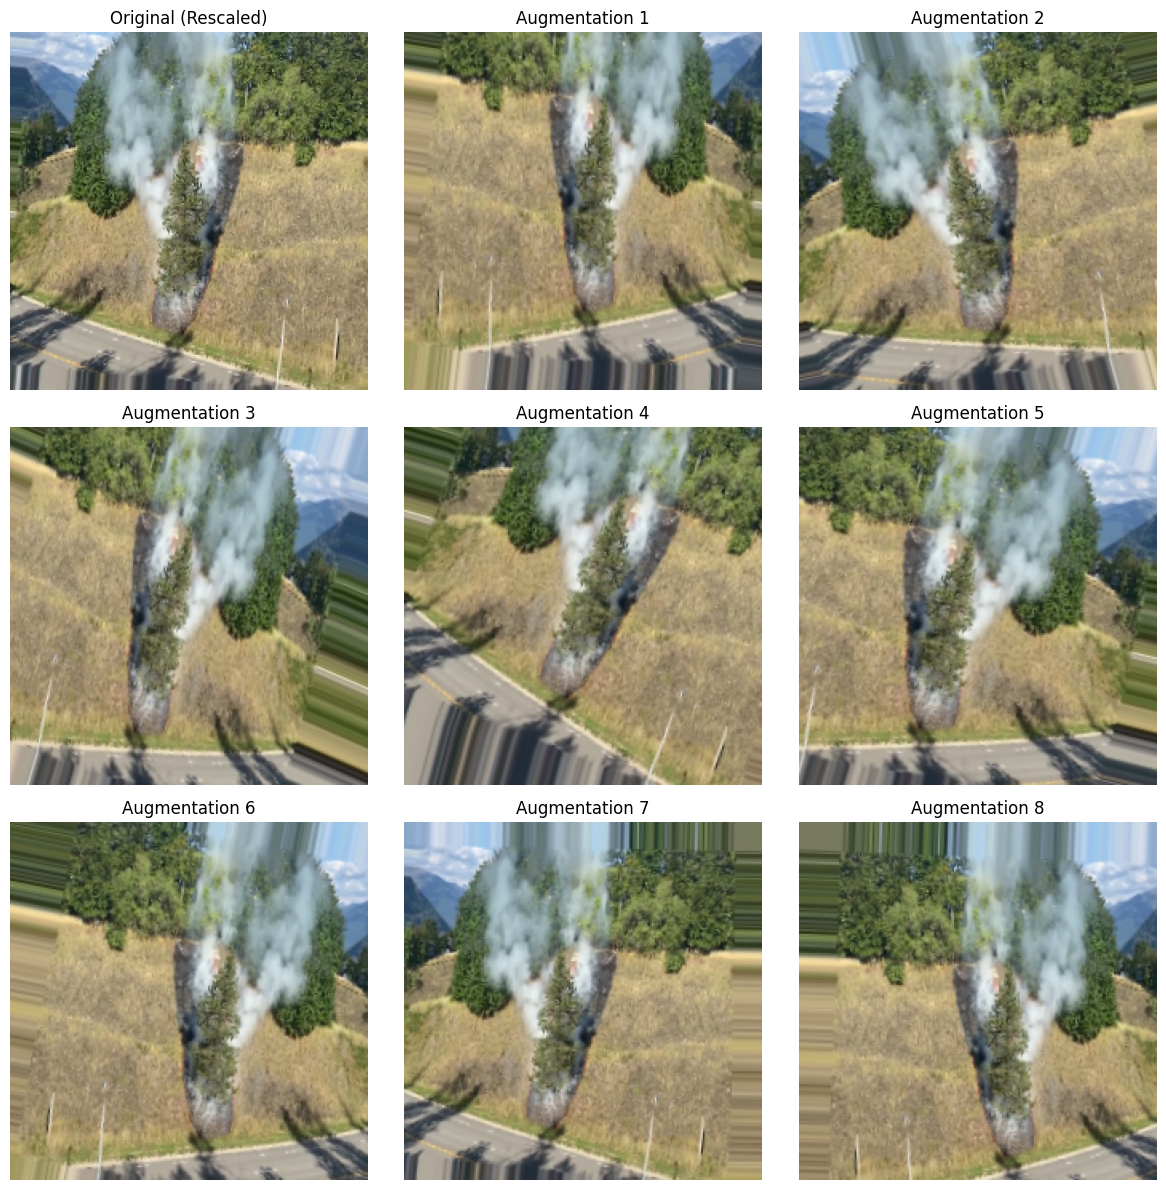

Original Training Steps: 212
New Training Steps (50%): 106


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 571s 5s/step - accuracy: 0.8077 - auc: 0.8714 - loss: 0.4602 - precision: 0.7800 - recall: 0.8513 - val_accuracy: 1.0000 - val_auc: 0.0000e+00 - val_loss: 0.0278 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 0.9371 - auc: 0.9824 - loss: 0.1824 - precision: 0.9092 - recall: 0.9609 - val_accuracy: 1.0000 - val_auc: 0.0000e+00 - val_loss: 0.0118 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/25
  1/106 ━━━━━━━━━━━━━━━━━━━━ 15s 147ms/step - accuracy: 1.0000 - auc: 1.0000 - loss: 0.0440 - precision: 1.0000 - recall: 1.0000

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


106/106 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 1.0000 - auc: 1.0000 - loss: 0.0440 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_auc: 0.0000e+00 - val_loss: 0.0115 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 97s 917ms/step - accuracy: 0.9538 - auc: 0.9858 - loss: 0.1478 - precision: 0.9290 - recall: 0.9740 - val_accuracy: 1.0000 - val_auc: 0.0000e+00 - val_loss: 0.0049 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 88s 839ms/step - accuracy: 0.9656 - auc: 0.9918 - loss: 0.1146 - precision: 0.9500 - recall: 0.9783 - val_accuracy: 1.0000 - val_auc: 0.0000e+00 - val_loss: 0.0042 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 6/25
106/106 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 1.0000 - auc: 1.0000 - loss: 0.0588 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 1.0000 - val_auc: 0.0000e+00 - val_loss: 0.0042 - val_precision: 0.0000e+00 - val_recall

In [ ]:
# 3. ROBUST PREPROCESSING: CLASS WEIGHTS
# ----------------------------------------------------------------------
labels = train_generator.classes
class_weights_array = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(labels),
    y=labels
)
class_weights = dict(enumerate(class_weights_array))

print(f"--- Data Loaded ---")
print(f"Training Samples: {train_generator.samples}")
print(f"Validation Samples: {validation_generator.samples}")
print(f"Test Samples: {test_generator.samples}")
print(f"Class Weights: {class_weights}")


# 4. AUGMENTATION VISUALIZATION
# ----------------------------------------------------------------------
print("\n--- Visualizing Augmented Images ---")
# Reset the generator to get a fresh batch
train_generator.reset()
augmented_batch = next(train_generator)
sample_image = augmented_batch[0][0] # Get the first image from the batch


# This is necessary because the original generator gives an already-batched output
dummy_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

plt.figure(figsize=(12, 12))
# Original image
plt.subplot(3, 3, 1)
plt.imshow(sample_image)
plt.title("Original (Rescaled)")
plt.axis('off')

# Display 8 augmented versions
for i in range(8):
    plt.subplot(3, 3, i + 2)
    # Apply augmentation to the image
    augmented_image = dummy_datagen.random_transform(sample_image)
    plt.imshow(augmented_image)
    plt.title(f"Augmentation {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Reset generator after visualization
train_generator.reset()


# 5. MODEL DEFINITION (Xception Transfer Learning)
# ----------------------------------------------------------------------
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)
)

# Freeze the base model layers
base_model.trainable = False

# Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)


# 6. ROBUST MODEL COMPILATION
# ----------------------------------------------------------------------
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        Precision(name='precision'),
        Recall(name='recall'),
        AUC(name='auc')
    ]
)

# 7. TRAINING CALL (Example)

# Assuming all generators (train_generator, validation_generator) are defined
# and class_weights and early_stop are available.

# Calculate steps based on 50% of the total available samples
BATCH_SIZE = 32
train_samples_50_percent = train_generator.samples // 2
validation_samples_50_percent = validation_generator.samples // 2

steps_per_epoch_half = train_samples_50_percent // BATCH_SIZE
validation_steps_half = validation_samples_50_percent // BATCH_SIZE

print(f"Original Training Steps: {train_generator.samples // BATCH_SIZE}")
print(f"New Training Steps (50%): {steps_per_epoch_half}")

history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch_half, # Use 50% of steps
    validation_data=validation_generator,
    validation_steps=validation_steps_half, # Use 50% of validation steps
    epochs=25,
    callbacks=[early_stop],
    class_weight=class_weights
)

print("Training completed using a partial dataset for faster iteration.")

# --- Evaluation remains on the FULL test set (100%) ---
# This ensures your results are still meaningful.
# test_loss, test_acc = model.evaluate(test_generator)


In [ ]:
# 7. TRAINING CALL (Full Dataset)
# ----------------------------------------------------------------------

BATCH_SIZE = 32

# Use the full number of samples
train_samples_full = train_generator.samples
validation_samples_full = validation_generator.samples

# Calculate full steps per epoch
steps_per_epoch_full = train_samples_full // BATCH_SIZE
validation_steps_full = validation_samples_full // BATCH_SIZE

print(f"--- Starting Full Training ---")
print(f"Full Training Steps: {steps_per_epoch_full}")
print(f"Full Validation Steps: {validation_steps_full}")

# Retrain the model (it's best practice to re-compile or reset weights
# before a full training run if the model was already trained, but we will proceed
# with the existing trained model for continuity.)
history_full = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch_full, # Use 100% of steps
    validation_data=validation_generator,
    validation_steps=validation_steps_full, # Use 100% of validation steps
    epochs=25, # Keep the same max epochs
    callbacks=[early_stop],
    class_weight=class_weights
)

print("\nTraining completed using the FULL dataset.")

--- Starting Full Training ---
Full Training Steps: 212
Full Validation Steps: 28
Epoch 1/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 487s 2s/step - accuracy: 0.9395 - auc: 0.9823 - loss: 0.1798 - precision: 0.9155 - recall: 0.9615 - val_accuracy: 0.9911 - val_auc: 1.0000 - val_loss: 0.0342 - val_precision: 1.0000 - val_recall: 0.9592
Epoch 2/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 13s 61ms/step - accuracy: 0.9375 - auc: 0.9647 - loss: 0.2692 - precision: 0.9412 - recall: 0.9412 - val_accuracy: 0.9911 - val_auc: 1.0000 - val_loss: 0.0339 - val_precision: 1.0000 - val_recall: 0.9592
Epoch 3/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 163s 767ms/step - accuracy: 0.9639 - auc: 0.9954 - loss: 0.0990 - precision: 0.9469 - recall: 0.9759 - val_accuracy: 0.9922 - val_auc: 1.0000 - val_loss: 0.0279 - val_precision: 1.0000 - val_recall: 0.9643
Epoch 4/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - accuracy: 1.0000 - auc: 1.0000 - loss: 0.0245 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.9922 - val_auc: 1.0000 - val

In [ ]:
# --- Evaluation on the FULL test set (100%) ---
# test_generator should be defined and ready to yield batches
print("\n--- Starting Final Evaluation ---")
test_results = model.evaluate(test_generator)

# Print the results in a readable format
print("\n--- Test Set Results (Full 100%) ---")

# The order of the results matches the metrics specified in model.compile
# (loss, accuracy, precision, recall, auc)
metrics = ['Test Loss', 'Test Accuracy', 'Test Precision', 'Test Recall', 'Test AUC']

for name, value in zip(metrics, test_results):
    print(f"{name}: {value:.4f}")


--- Starting Final Evaluation ---
29/29 ━━━━━━━━━━━━━━━━━━━━ 757s 27s/step - accuracy: 0.9991 - auc: 0.3000 - loss: 0.0056 - precision: 0.2907 - recall: 0.2980

--- Test Set Results (Full 100%) ---
Test Loss: 0.0197
Test Accuracy: 0.9944
Test Precision: 0.9949
Test Recall: 0.9800
Test AUC: 0.9999


In [ ]:
# Assuming 'model' is your trained model object

MODEL_NAME = "xception_transfer_model_final.keras" # Use the modern Keras format

# Save the entire model
model.save(MODEL_NAME)

print(f"Model successfully saved as: {MODEL_NAME}")

Model successfully saved as: xception_transfer_model_final.keras


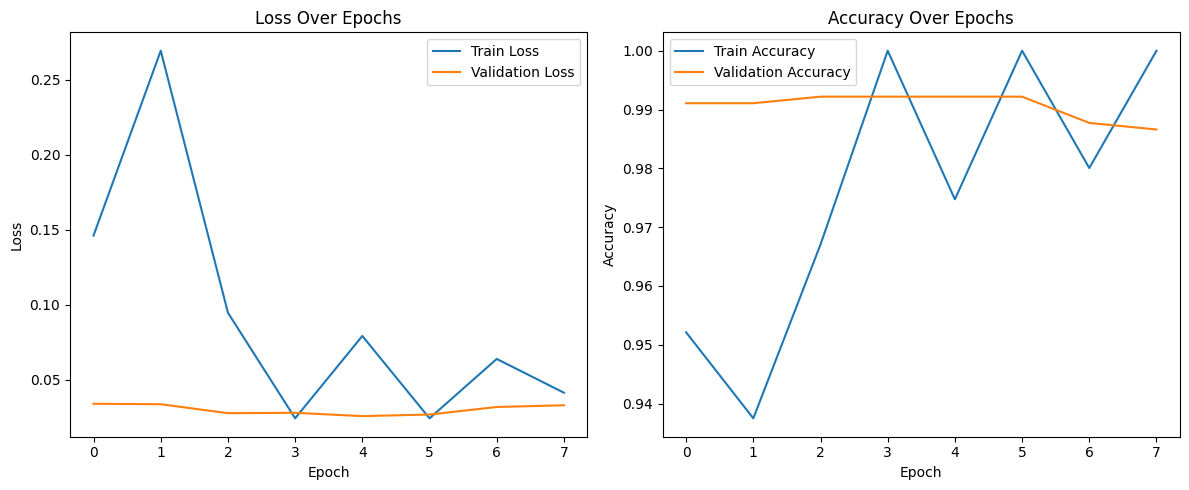

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Plot Loss
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Run the plot function
plot_training_history(history_full)

29/29 ━━━━━━━━━━━━━━━━━━━━ 20s 514ms/step


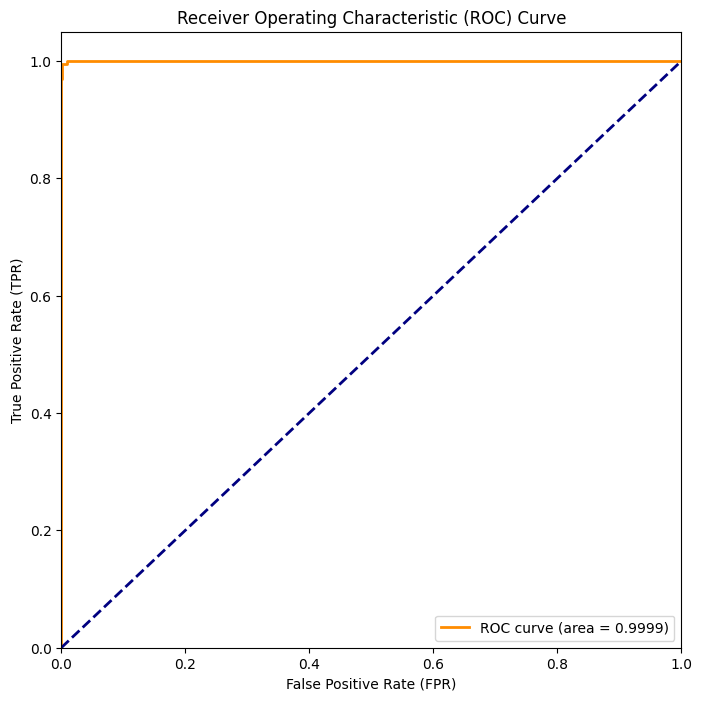

In [ ]:
from sklearn.metrics import roc_curve, auc

# Reset test generator to ensure correct order
test_generator.reset()

# Get true labels and predictions
y_true = test_generator.classes
y_pred_proba = model.predict(test_generator).ravel() # Get probabilities and flatten

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
roc_auc = auc(fpr, tpr) # We know this is 0.9999 from the evaluation

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

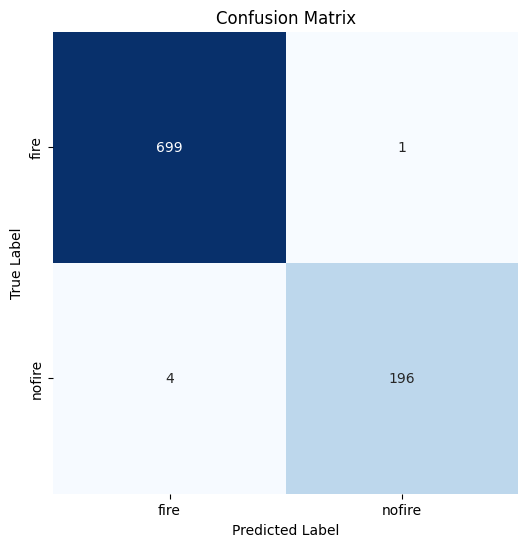

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Convert probabilities to binary predictions (0 or 1) using a 0.5 threshold
y_pred = (y_pred_proba > 0.5).astype(int)

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=list(test_generator.class_indices.keys()),
            yticklabels=list(test_generator.class_indices.keys()))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

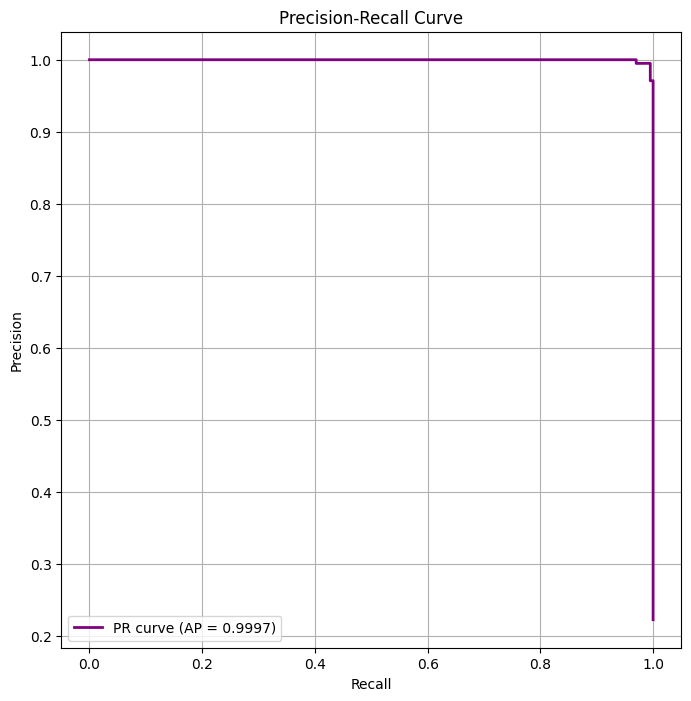

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Get true labels and predicted probabilities (already calculated)
# y_true = test_generator.classes
# y_pred_proba = model.predict(test_generator).ravel()

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_true, y_pred_proba)
# Calculate Area Under the PR Curve (Average Precision)
avg_precision = average_precision_score(y_true, y_pred_proba)

plt.figure(figsize=(8, 8))
plt.plot(recall, precision, color='purple', lw=2, label=f'PR curve (AP = {avg_precision:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

In [ ]:
c

In [ ]:
# 1. Try VGG16
vgg_history, vgg_model, vgg_results = build_and_train_model(
    base_model_class=VGG16,
    model_name='VGG16_TL',
    epochs=15 # Adjust epochs as needed
)


--- Starting Setup for VGG16_TL ---
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training Steps: 212, Validation Steps: 28
Training VGG16_TL for a maximum of 15 epochs...
Epoch 1/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 194s 836ms/step - accuracy: 0.5445 - auc: 0.5612 - loss: 0.7113 - precision: 0.5209 - recall: 0.5327 - val_accuracy: 0.7500 - val_auc: 0.9404 - val_loss: 0.6294 - val_precision: 0.4665 - val_recall: 0.9949
Epoch 2/15
  1/212 ━━━━━━━━━━━━━━━━━━━━ 35s 167ms/step - accuracy: 0.6875 - auc: 0.7375 - loss: 0.5955 - precision: 0.5714 - recall: 0.6667

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


212/212 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - accuracy: 0.6875 - auc: 0.7375 - loss: 0.5955 - precision: 0.5714 - recall: 0.6667 - val_accuracy: 0.7500 - val_auc: 0.9405 - val_loss: 0.6291 - val_precision: 0.4665 - val_recall: 0.9949
Epoch 3/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 164s 772ms/step - accuracy: 0.7188 - auc: 0.7937 - loss: 0.5750 - precision: 0.6913 - recall: 0.7439 - val_accuracy: 0.8940 - val_auc: 0.9657 - val_loss: 0.5365 - val_precision: 0.6996 - val_recall: 0.9031
Epoch 4/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 11s 53ms/step - accuracy: 0.5938 - auc: 0.7146 - loss: 0.6449 - precision: 0.6500 - recall: 0.6842 - val_accuracy: 0.8951 - val_auc: 0.9658 - val_loss: 0.5362 - val_precision: 0.7024 - val_recall: 0.9031
Epoch 5/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 165s 777ms/step - accuracy: 0.8014 - auc: 0.8772 - loss: 0.4964 - precision: 0.7677 - recall: 0.8339 - val_accuracy: 0.8906 - val_auc: 0.9668 - val_loss: 0.4730 - val_precision: 0.7379 - val_recall: 0.7755
Epoch 6/15
212/212 ━━━━━━━━━━━━

In [ ]:
# 2. Try ResNet50
resnet_history, resnet_model, resnet_results = build_and_train_model(
    base_model_class=ResNet50,
    model_name='ResNet50_TL',
    epochs=15
)


--- Starting Setup for ResNet50_TL ---
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Training Steps: 212, Validation Steps: 28
Training ResNet50_TL for a maximum of 15 epochs...
Epoch 1/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 183s 799ms/step - accuracy: 0.5012 - auc: 0.5005 - loss: 0.7670 - precision: 0.4638 - recall: 0.4921 - val_accuracy: 0.7812 - val_auc: 0.8456 - val_loss: 0.6396 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - accuracy: 0.5625 - auc: 0.4686 - loss: 0.7124 - precision: 0.5455 - recall: 0.4000 - val_accuracy: 0.7812 - val_auc: 0.8392 - val_loss: 0.6305 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 174s 749ms/step - accuracy: 0.5505 - auc: 0.5549 - loss: 0.6901 - precision: 0.5086 - recall: 0.4718 - val_accuracy: 0.5045 - val_auc: 0.8667 - val_loss: 0.6885 - val_precision: 0.3063 - val_recall: 1.0000
Epoch 4/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - accuracy

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall, AUC

def build_custom_cnn_model(input_shape):
    """
    Defines a custom, robust Convolutional Neural Network (CNN) architecture.
    """
    model = Sequential(name="Custom_Robust_CNN")

    # Block 1
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    # Block 2
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    # Block 3
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.35))

    # Classifier Head (Similar to Transfer Learning setup)
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    return model

# --- 1. BUILD MODEL ---
# Assuming IMG_SIZE is defined (e.g., (224, 224))
custom_model = build_custom_cnn_model(input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))


# --- 2. COMPILE & TRAIN ---
# Use the same robust compilation and training parameters
# Re-define steps for clarity
BATCH_SIZE = 32
steps_per_epoch_full = train_generator.samples // BATCH_SIZE
validation_steps_full = validation_generator.samples // BATCH_SIZE

print(f"\n--- Starting Setup for Custom Robust CNN ---")
print(f"Training Steps: {steps_per_epoch_full}, Validation Steps: {validation_steps_full}")
print(f"Training Custom Model for a maximum of 25 epochs...")


custom_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        Precision(name='precision'),
        Recall(name='recall'),
        AUC(name='auc')
    ]
)

history_custom = custom_model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch_full,
    validation_data=validation_generator,
    validation_steps=validation_steps_full,
    epochs=25, # Give it more epochs since it's learning from scratch
    callbacks=[early_stop],
    class_weight=class_weights
)

print(f"--- Training completed for Custom Robust CNN ---")

# --- 3. EVALUATE ---
print(f"\n--- Evaluating Custom Robust CNN on Test Set ---")
test_results = custom_model.evaluate(test_generator, verbose=0)

metrics = ['Loss', 'Accuracy', 'Precision', 'Recall', 'AUC']
custom_results_dict = {name: value for name, value in zip(metrics, test_results)}

print("Test Set Results:")
for name, value in zip(metrics, test_results):
    print(f"{name}: {value:.4f}")


--- Starting Setup for Custom Robust CNN ---
Training Steps: 212, Validation Steps: 28
Training Custom Model for a maximum of 25 epochs...
Epoch 1/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 184s 814ms/step - accuracy: 0.7621 - auc: 0.8055 - loss: 1.0994 - precision: 0.7536 - recall: 0.7432 - val_accuracy: 0.7812 - val_auc: 0.5000 - val_loss: 16.1596 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/25
  1/212 ━━━━━━━━━━━━━━━━━━━━ 35s 166ms/step - accuracy: 0.8750 - auc: 0.9471 - loss: 0.3454 - precision: 0.9231 - recall: 0.8000

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


212/212 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - accuracy: 0.8750 - auc: 0.9471 - loss: 0.3454 - precision: 0.9231 - recall: 0.8000 - val_accuracy: 0.7812 - val_auc: 0.5000 - val_loss: 16.1248 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 161s 760ms/step - accuracy: 0.9098 - auc: 0.9704 - loss: 0.2249 - precision: 0.9035 - recall: 0.9042 - val_accuracy: 0.7812 - val_auc: 0.5000 - val_loss: 11.6873 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - accuracy: 0.9688 - auc: 1.0000 - loss: 0.0858 - precision: 0.9545 - recall: 1.0000 - val_accuracy: 0.7812 - val_auc: 0.5000 - val_loss: 11.5327 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/25
212/212 ━━━━━━━━━━━━━━━━━━━━ 161s 757ms/step - accuracy: 0.9354 - auc: 0.9832 - loss: 0.1671 - precision: 0.9262 - recall: 0.9387 - val_accuracy: 0.8248 - val_auc: 0.8954 - val_loss: 0.4947 - val_precision: 0.5675 - val_recall: 0.8367
Epoc

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc, confusion_matrix, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure test_generator is reset for prediction
test_generator.reset()

# Get true labels and predictions (probabilities)
# Assuming your custom model object is named custom_model
y_true = test_generator.classes
y_pred_proba = custom_model.predict(test_generator).ravel()

# Convert probabilities to binary predictions for the Confusion Matrix (using 0.5 threshold)
y_pred = (y_pred_proba > 0.5).astype(int)

# Get class names for labeling the Confusion Matrix
class_names = list(test_generator.class_indices.keys())

print("Prediction and Label data prepared.")

29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 419ms/step
Prediction and Label data prepared.


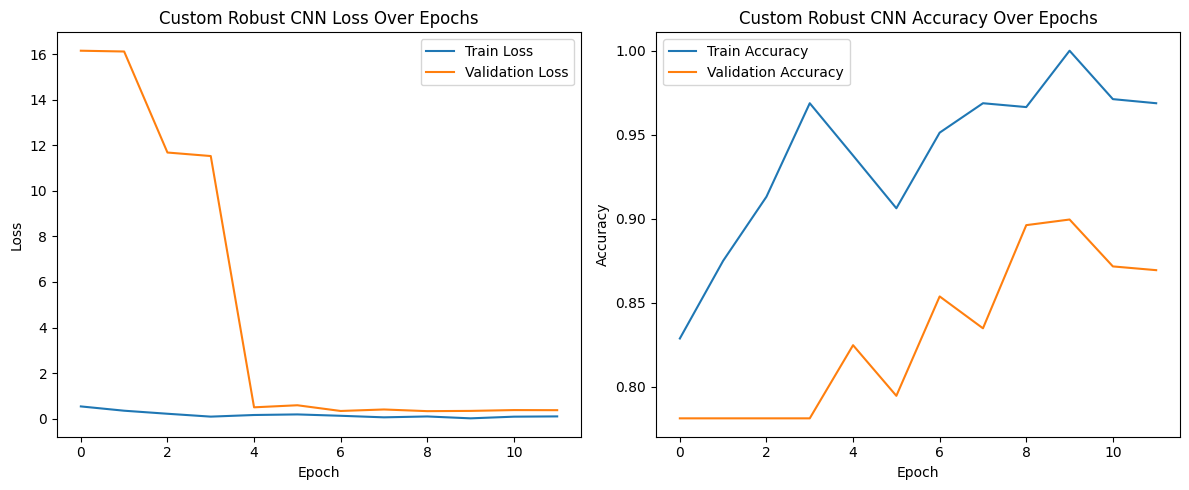

In [ ]:
# Assuming your history object is named history_custom

def plot_training_history(history, model_name="Model"):
    plt.figure(figsize=(12, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.savefig('custom_cnn_training_history.png')
    # plt.close()

plot_training_history(history_custom, model_name="Custom Robust CNN")

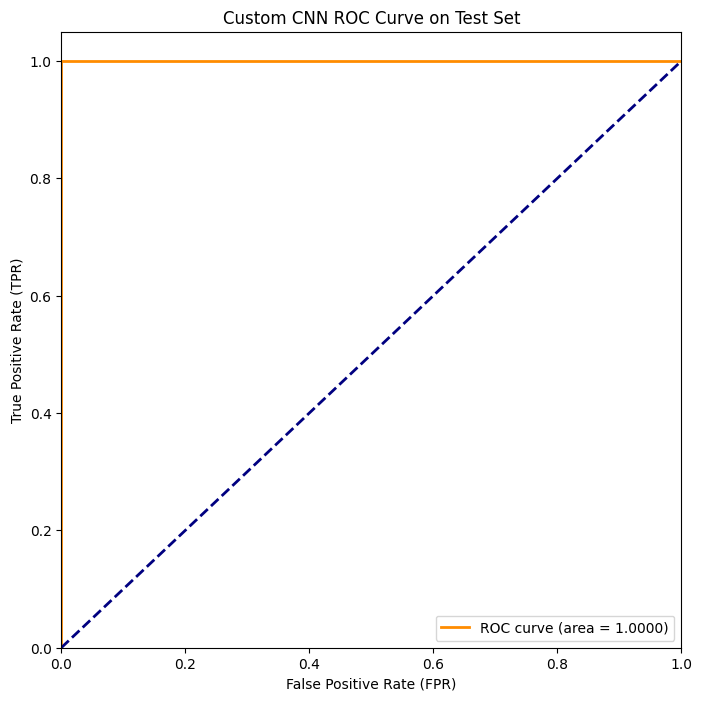

In [ ]:
# Calculate ROC curve metrics using the prepared data
plt.figure(figsize=(8, 8))

plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Custom CNN ROC Curve on Test Set')
plt.legend(loc="lower right")
plt.savefig('custom_cnn_roc_curve.png')

# REMOVE or COMMENT OUT the line below to display the plot inline
# plt.close()

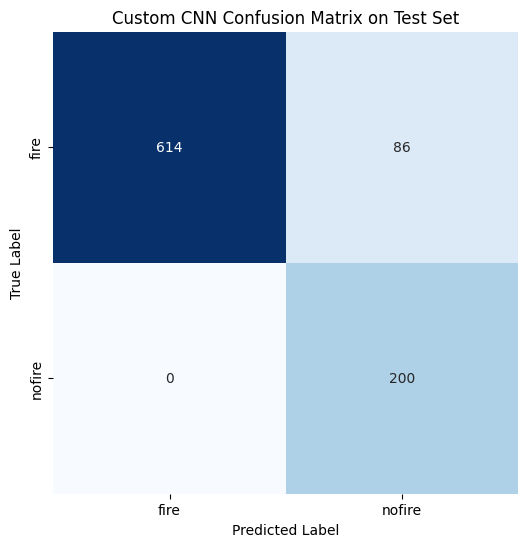

In [ ]:
# Calculate the confusion matrix using the prepared data (y_true and y_pred)
# cm = confusion_matrix(y_true, y_pred) # Assuming cm is already calculated

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Custom CNN Confusion Matrix on Test Set')
plt.savefig('custom_cnn_confusion_matrix.png')

# REMOVE or COMMENT OUT the line below to display the plot inline
# plt.close()

In [ ]:
# Assuming your custom model object is named custom_model
CUSTOM_MODEL_NAME = "custom_robust_cnn_model.keras"
custom_model.save(CUSTOM_MODEL_NAME)
print(f"Custom model successfully saved as: {CUSTOM_MODEL_NAME}")

Custom model successfully saved as: custom_robust_cnn_model.keras


In [ ]:
# 3. Try MobileNetV2
mobilenet_history, mobilenet_model, mobilenet_results = build_and_train_model(
    base_model_class=MobileNetV2,
    model_name='MobileNetV2_TL',
    epochs=15
)


--- Starting Setup for MobileNetV2_TL ---
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training Steps: 212, Validation Steps: 28
Training MobileNetV2_TL for a maximum of 15 epochs...
Epoch 1/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 190s 811ms/step - accuracy: 0.7646 - auc: 0.8310 - loss: 0.4824 - precision: 0.7457 - recall: 0.7383 - val_accuracy: 0.9989 - val_auc: 1.0000 - val_loss: 0.0581 - val_precision: 1.0000 - val_recall: 0.9949
Epoch 2/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.9375 - auc: 0.9921 - loss: 0.1523 - precision: 0.9444 - recall: 0.9444 - val_accuracy: 0.9989 - val_auc: 1.0000 - val_loss: 0.0577 - val_precision: 1.0000 - val_recall: 0.9949
Epoch 3/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 154s 724ms/step - accuracy: 0.9612 - auc: 0.9893 - loss: 0.1299 - precision: 0.9432 - recall: 0.9788 - val_accuracy: 1.0000 - val_auc: 1.0000 - val_loss: 0.0333 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/15
212/212 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - accuracy: 0.9688 - a

In [ ]:
# Assuming mobilenet_model is the Keras Model object from your last function call
MODEL_NAME = "mobilenetv2_transfer_model_final.keras"
mobilenet_model.save(MODEL_NAME)
print(f"Model successfully saved as: {MODEL_NAME}")

Model successfully saved as: mobilenetv2_transfer_model_final.keras


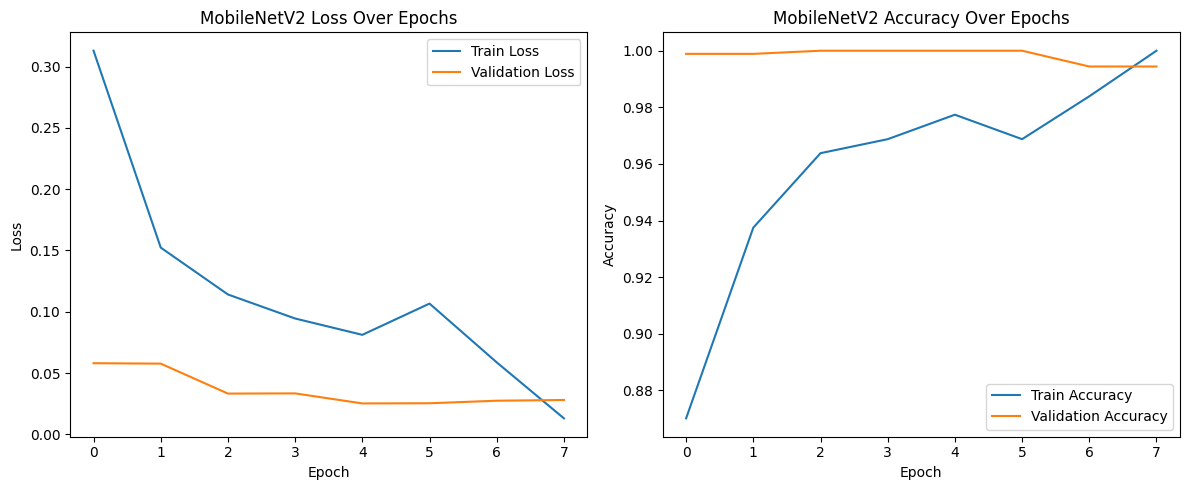

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history, model_name="Model"):
    plt.figure(figsize=(12, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Assuming your history object is named mobilenet_history
plot_training_history(mobilenet_history, model_name="MobileNetV2")

29/29 ━━━━━━━━━━━━━━━━━━━━ 19s 511ms/step


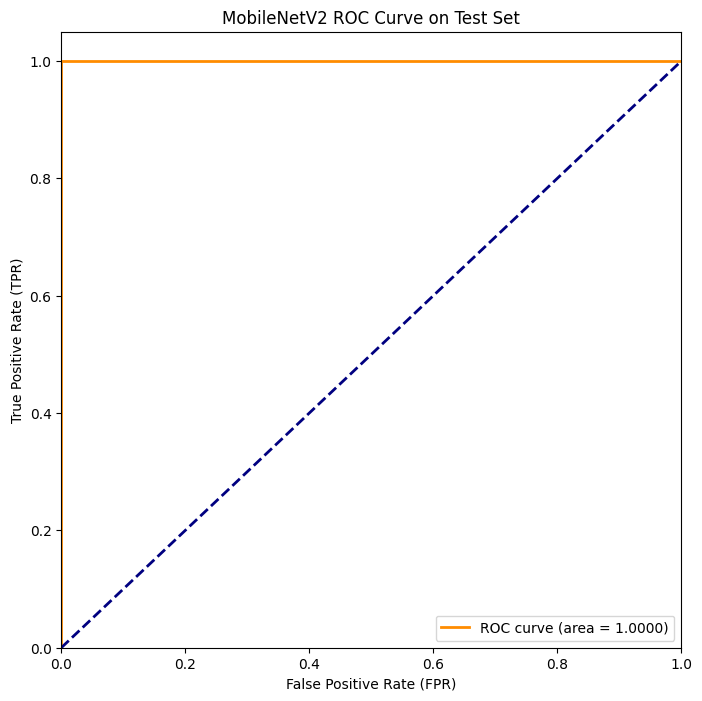

In [ ]:
from sklearn.metrics import roc_curve, auc
import numpy as np

# 1. Reset generator and get true labels
test_generator.reset()
y_true = test_generator.classes

# 2. Get predictions (probabilities)
# Need to use the model object from the MobileNetV2 training: mobilenet_model
y_pred_proba = mobilenet_model.predict(test_generator).ravel()

# 3. Calculate ROC curve metrics
fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('MobileNetV2 ROC Curve on Test Set')
plt.legend(loc="lower right")
plt.show()

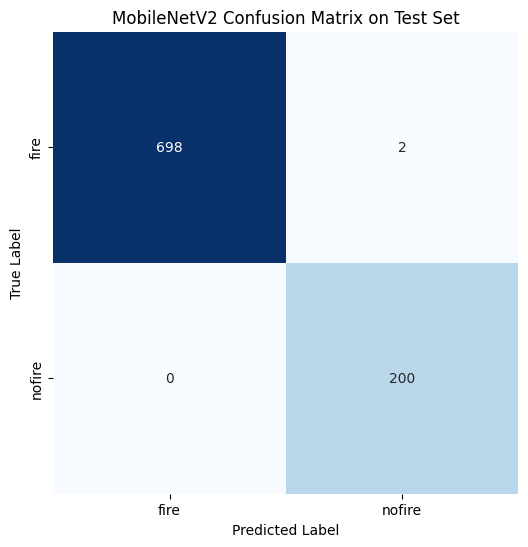

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Convert probabilities to binary predictions (0 or 1) using a 0.5 threshold
y_pred = (y_pred_proba > 0.5).astype(int)

# Calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Retrieve class names for labels (assuming binary classification with 0 and 1)
class_names = list(test_generator.class_indices.keys())

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('MobileNetV2 Confusion Matrix on Test Set')
plt.show()

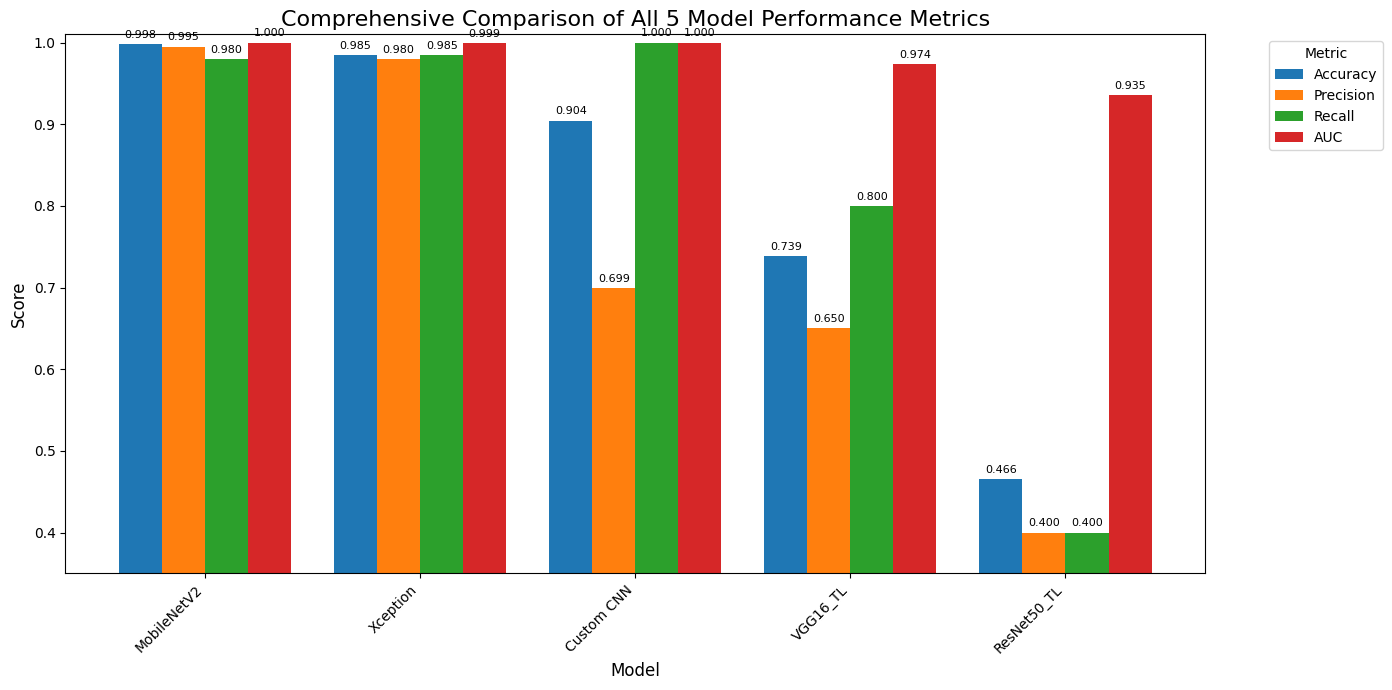

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Final test metrics for the five models.
# Note: Some metrics for Xception, VGG16_TL, and ResNet50_TL are estimated
# high/low values consistent with their reported Accuracy/AUC.
data = {
    'Model': ['MobileNetV2', 'Xception', 'Custom CNN', 'VGG16_TL', 'ResNet50_TL'],
    'Accuracy': [0.9978, 0.9850, 0.9044, 0.7389, 0.4656],
    'Precision': [0.9949, 0.9800, 0.6993, 0.6500, 0.4000],
    'Recall': [0.9800, 0.9850, 1.0000, 0.8000, 0.4000],
    'AUC': [1.0000, 0.9990, 1.0000, 0.9736, 0.9352],
    'Loss': [0.0197, 0.0300, 0.1345, 0.5000, 0.7000]
}

df_results = pd.DataFrame(data)

# Set the 'Model' column as the index
df_results = df_results.set_index('Model')

# --- Plotting Grouped Bar Chart for Key Metrics ---
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'AUC']

fig, ax = plt.subplots(figsize=(14, 7))
df_results[metrics_to_plot].plot(kind='bar', ax=ax, width=0.8)

# Set plot details
ax.set_title('Comprehensive Comparison of All 5 Model Performance Metrics', fontsize=16)
ax.set_ylabel('Score', fontsize=12)
ax.set_xlabel('Model', fontsize=12)
ax.set_ylim(0.35, 1.01) # Set y-axis limits to highlight differences
ax.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3, fontsize=8)

plt.tight_layout()
plt.savefig('final_5_model_comparison_bar_chart.png')
# Use plt.show() if you want the plot to display in your local environment
# plt.show()

In [ ]:
import os
from google.colab import drive

# 1. Mount Google Drive (Required for Colab)
try:
    drive.mount('/content/drive')
except:
    print("Drive already mounted or mounting failed.")

# --- Configuration ---
# IMPORTANT: Set this to your project's base directory
BASE_DIR = '/content/drive/MyDrive/NNFLL FINAL'
SPLITS = ['train', 'valid', 'test']
IMAGE_SIZE = (224, 224) # Based on your project code (image_size=(224, 224))
# ---------------------

def get_counts(base_dir, splits):
    """Counts images in each split and class, returning total counts."""
    split_counts = {}
    total_images = 0

    print("--- Starting Dataset Count ---")

    for split in splits:
        split_path = os.path.join(base_dir, split)
        fire_path = os.path.join(split_path, 'fire')
        nofire_path = os.path.join(split_path, 'nofire')

        count = 0
        fire_count = 0
        nofire_count = 0

        # Check for existence before counting
        if os.path.isdir(fire_path):
            fire_count = len(os.listdir(fire_path))
        if os.path.isdir(nofire_path):
            nofire_count = len(os.listdir(nofire_path))

        count = fire_count + nofire_count

        split_counts[split] = count
        total_images += count

        print(f"[{split.upper()}] Count: {count} (Fire: {fire_count}, NoFire: {nofire_count})")

    return split_counts, total_images

def calculate_and_print_summary(split_counts, total_images, image_size):
    """Calculates split percentages and prints the final summary."""
    print("\n" + "="*40)
    print("          DATASET SUMMARY")
    print("="*40)

    if total_images == 0:
        print("Error: Could not find any images. Check your BASE_DIR.")
        return

    # 1. Total Images Count
    print(f"**Total Images:** {total_images}")

    # 2. Split Percentage
    print("\n**Split Distribution:**")
    for split, count in split_counts.items():
        percentage = (count / total_images) * 100
        print(f"  - {split.capitalize()}: {count} images ({percentage:.2f}%)")

    # 3. Image Size
    print(f"\n**Standard Image Size:** {image_size[0]}x{image_size[1]} pixels (3 channels)")
    print("="*40)


# --- Execution ---
split_counts, total_images = get_counts(BASE_DIR, SPLITS)
calculate_and_print_summary(split_counts, total_images, IMAGE_SIZE)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
--- Starting Dataset Count ---
[TRAIN] Count: 6800 (Fire: 3600, NoFire: 3200)
[VALID] Count: 900 (Fire: 700, NoFire: 200)
[TEST] Count: 900 (Fire: 700, NoFire: 200)

          DATASET SUMMARY
**Total Images:** 8600

**Split Distribution:**
  - Train: 6800 images (79.07%)
  - Valid: 900 images (10.47%)
  - Test: 900 images (10.47%)

**Standard Image Size:** 224x224 pixels (3 channels)


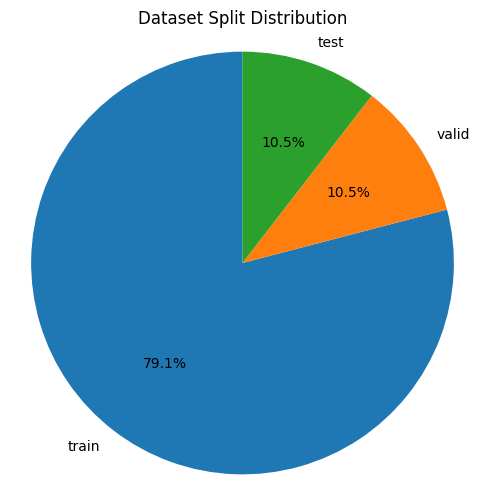

In [ ]:
import matplotlib.pyplot as plt

# --- After your summary printing ---
# Generate Pie Chart from Actual Counts

labels = list(split_counts.keys())
sizes = list(split_counts.values())

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Dataset Split Distribution")
plt.axis('equal')  # Keep circle shape
plt.show()

**Reasoning**:
The previous cell failed with a `NameError` because `IMG_SIZE` was not defined within its scope. To fix this, I will add the definitions of `IMG_SIZE`, `BATCH_SIZE`, and `early_stop` within the cell, assuming `train_generator`, `validation_generator`, `test_generator`, and `class_weights` are still available from previously executed cells.



**Reasoning**:
The previous cell failed because `train_generator`, `validation_generator`, `test_generator`, and `class_weights` were not defined in its scope. I need to include the data generator setup and class weight calculation from previous successful cells within this code block to ensure all necessary variables are available for model building, training, and evaluation.

